# ASSIGNMENT:13

# SET :1

# TASK:CLASSIFICATION USING KNN( K NEAREST NEIGHBOUR )


To prepare a model for glass classification using KNN

In [8]:
pip install sweetviz

Importing Libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
import sweetviz as sv
%matplotlib inline

In [59]:
data=pd.read_csv('glass.csv')
data.head(10)

RI     Na    Mg    Al     Si     K    Ca   Ba    Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.00     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00     1
5  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26     1
6  1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.00     1
7  1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.0  0.00     1
8  1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.0  0.00     1
9  1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.0  0.11     1

In [60]:
data.shape

(214, 10)

# Checking Null Values

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [62]:
data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

# Performing EDA Analysis

In [7]:
eda_report=pp.ProfileReport(data)
eda_report

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
my_report = sv.analyze(data)
my_report.show_html('glass.html')

                                             |          | [  0%]   00:00 -> (? left)

Report glass.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Visualization

<AxesSubplot:>

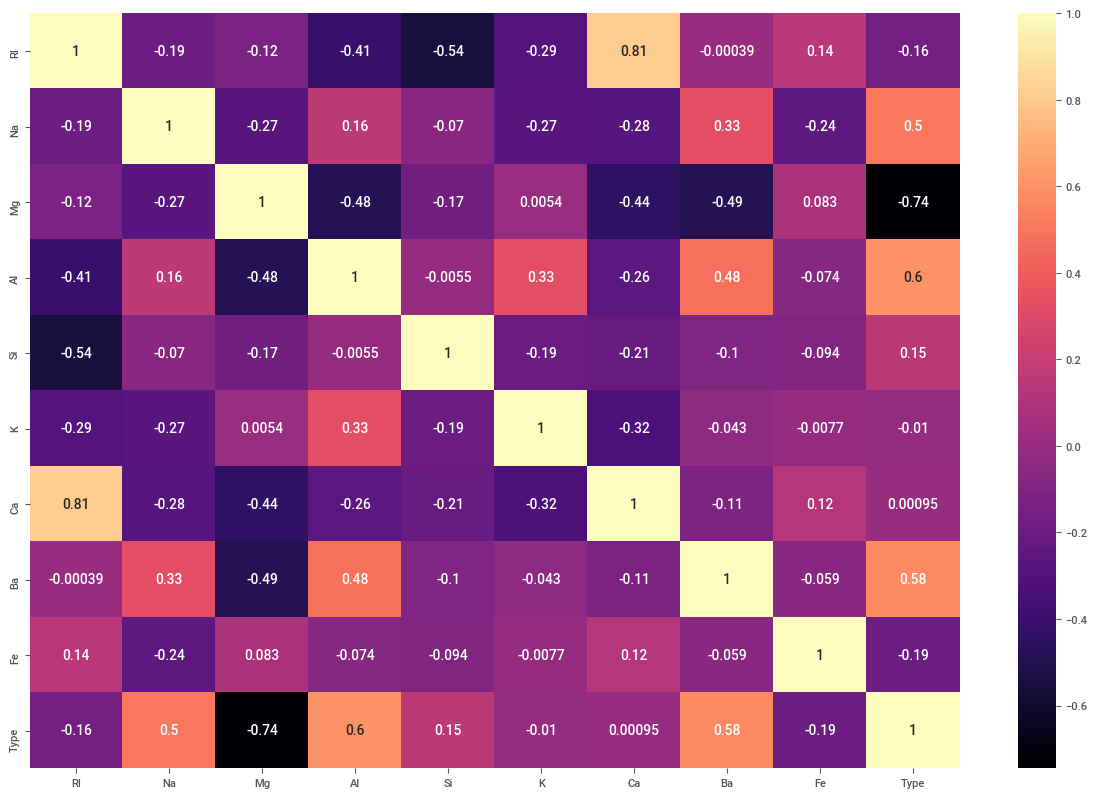

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='magma')

# Creating Folds

In [63]:
from sklearn .model_selection import KFold
from sklearn.model_selection import cross_val_score

In [64]:
data

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]

In [65]:
array=data.values
array

array([[ 1.52101, 13.64   ,  4.49   , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  0.     ,  0.     ,  1.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  1.64   ,  0.     ,  7.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  1.57   ,  0.     ,  7.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  1.67   ,  0.     ,  7.     ]])

In [66]:
x=array[:,:9]
y=array[:,9]
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7.])

In [67]:
num_folds=20
k_fold=KFold(n_splits=20)

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
model=KNeighborsClassifier(n_neighbors=10)
result=cross_val_score(model,x,y,cv=k_fold)
print(result.mean())

0.5559090909090909


# USING TRAIN AND TEST SPLIT METHODS

In [70]:
from sklearn.model_selection import train_test_split
x1=data.iloc[:,:9]
y1=data.iloc[:,9]
y1

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=5)

Model building for train test split method

In [72]:
model1=KNeighborsClassifier(n_neighbors=4)
model1.fit(x_train,y_train)
pred=model1.predict(x_test)
pred

array([1, 2, 2, 2, 1, 7, 7, 1, 1, 3, 2, 1, 2, 1, 1, 1, 2, 7, 2, 6, 2, 2,
       2, 2, 1, 1, 6, 7, 2, 3, 5, 1, 2, 7, 1, 7, 2, 2, 1, 2, 1, 1, 1],
      dtype=int64)

# Checking Accuracy of the model

In [73]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(pred,y_test)
accuracy

0.7209302325581395

# Grid search method for tuning 

In [89]:
import numpy 
from sklearn.model_selection import GridSearchCV


In [90]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [93]:
Model= KNeighborsClassifier()
grid = GridSearchCV(estimator=Model, param_grid=param_grid)
grid.fit(x, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [94]:
grid.best_params_

{'n_neighbors': 1}

In [95]:
grid.best_score_

0.640531561461794

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\mode

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


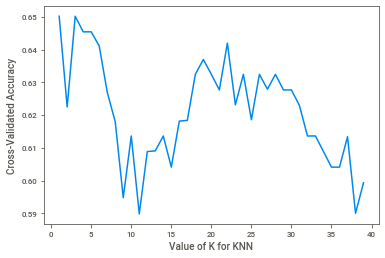

In [101]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 40)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()